Group Members
-Fitsum Endashaw 
-Dawit Hailu

In [4]:
import pandas as pd
data = pd.read_csv("gap.tsv", sep='\t')
data.head()
## # A tibble: 6 × 6

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


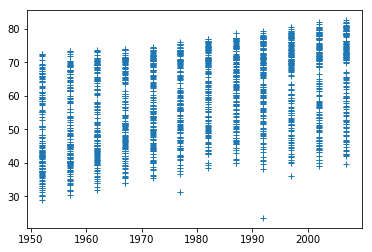

In [5]:
# Exercise 1 : Make a scatter plot of life expectancy across time.
import matplotlib.pyplot as plot
import numpy
%matplotlib inline
plot.plot(data['year'], data['lifeExp'], "+")

Text(0.5,1,'Life expectancy over time')

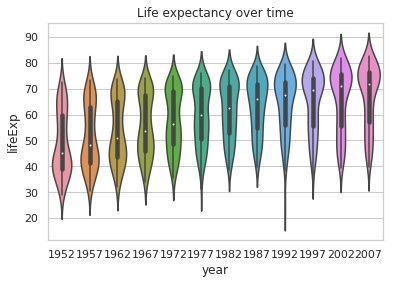

In [6]:
import seaborn as sbo
sbo.set(style="whitegrid")
sb = sbo.violinplot(x="year", y="lifeExp", data=data)
sb.set_title('Life expectancy over time')

# A slightly different way of making the same plot 
# is looking at the distribution of life expectancy 
# across countries as it changes over time:

In [7]:
## Question 1
# The general trend we noticed after ploting is a linear increasing of life expectancy across time.

In [8]:
## Question 2
# The graph is skewed towards the bottom, which meant the life expectancy was lower during the earlier years in most countries. 
# but as the year progressed, we saw a shift in the average life expectancy in all of the countries 
# From 1952 to 2007, the average life expectancy has increased by 20 years across all countries. 
## Question 3
# We reject the Null hypothesis , because we can clearly see a relationship between life expectancy and year, they are directly related.  
## Question 4
# Since residual is (actual value - expected value), we believe countries with that had high
# life expectancy on average (Australia, Europe, Americas) would have a positive residual. 
# on the other hand countries with lower life expectancies on average (Africa, and some Asian countries) would have negative residuals.
## Question 5
# Considering the linear regression model, the residual on the violin plot
# should decrease linearly as time increases 

In [9]:
## Exercise 2
import numpy as np
from sklearn import linear_model
reg = linear_model.LinearRegression()
e2_X = [[x] for x in data['year'].values]
e2_Y = [[y] for y in data['lifeExp'].values]
regfit = reg.fit(e2_X, e2_Y)

In [10]:
## Question 6
# since the average life expectancy increased by 20 years from 1952 to 2007 
# and since the increase is pretty uniform across the 12 years 
# 20 /12 = 1.6666 
## Question 7
# We still reject the Null hypothesis, 
# because the graph clearly shows the direct relationship between life expectancy and year.

Text(0.5,1,'Life expectancy over time')

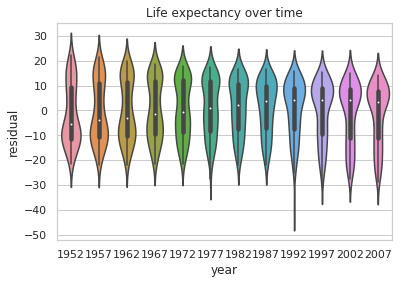

In [11]:
##Exercise 3
plifeExps = []
for i in data['year'].values:
    plifeExps.append(regfit.predict(i)[0][0])
data['plifeExp'] = pd.Series(plifeExps, index = data.index)
data['residual'] = data['lifeExp'] - data['plifeExp']

sb = sbo.violinplot(x="year", y="residual", data=data)
sb.set_title('Life expectancy over time')

In [12]:
## Question 8
# Yes,it matches our expectation

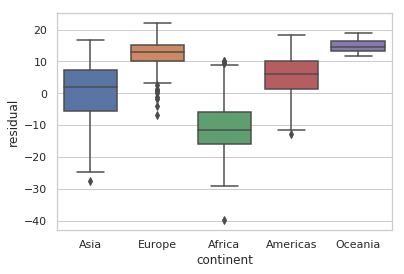

In [13]:
## Exercise 4
sb = sbo.boxplot(x="continent", y="residual", data=data)

In [14]:
## Question 9

# Yes there is a dependence , continents like Europe and Oceania have positive residuals
# that mean on average these continents have better life expectancy than Africa 
# and some countries in Asia that have negative residuals. 

In [15]:
## Exercise 5
# we couldnt manage to plot the regresssion using
# seaborn so we used ggplot, this might be machine dependent 

# sb = sbo.violinplot(x="year", y="lifeExp",hue ="continent",data=data)
# stat_smooth(method = "lm", se=True, span = 0.2)
 
import ggplot 
from ggplot import *
ggplot(aes(x='year', y='lifeExp', color='continent'), data=data) +\
   stat_smooth(method = "lm", se=True, span = 0.2) +\
    geom_point(size=20) +\
    theme_bw()


ModuleNotFoundError: No module named 'ggplot'

In [16]:
## Question 10
# Yes, since we need all three variables (life expectancy, year, and continent)
# to give a complete picture of the data and in the above plot, we manage to put them all in one graph

In [17]:
##Exercise 6
import statsmodels.api as sm
from statsmodels.formula.api import ols
cont = data['continent'].values
store = []
for i in cont:
    if i == 'Africa': 
        store.append(1)
    elif i == 'Americas':
        store.append(2)
    elif i == 'Asia':
        store.append(3)
    elif i == 'Europe':
        store.append(4)
    else:
        store.append(5)
data['ci'] = pd.Series(store, index = data.index)
regression = ols(formula='lifeExp ~ year + ci + year * continent', data=data).fit()
regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                lifeExp   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     424.3
Date:                Sat, 15 Dec 2018   Prob (F-statistic):               0.00
Time:                        17:59:10   Log-Likelihood:                -5771.9
No. Observations:                1704   AIC:                         1.156e+04
Df Residuals:                    1694   BIC:                         1.162e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                   -521.4943     47.441    -10.993      0.000    -614.543    -428.446
continent[T.Americas]       -136.0849     56.099     -2.426      0.015    -246.115     -26.055
continent[T.Asia]           -307.1060     57.962     -5.298      0.000    -420.791    -193.421
continent[T.Europe]          165.1374     71.080      2.323      0.020      25.723     304.552
continent[T.Oceania]         193.4039     86.527      2.235      0.026      23.692     363.116
year                           0.2895      0.017     17.387      0.000       0.257       0.322
year:continent[T.Americas]     0.0781      0.029      2.673      0.008       0.021       0.135
year:continent[T.Asia]         0.1636      0.027      6.121      0.000       0.111       0.216
year:continent[T.Europe]      -0.0676      0.028     -2.455      0.014      -0.122      -0.014
year:continent[T.Oceania]     -0.0793      0.087     -0.916      0.360      -0.249       0.090
ci                            -2.7635     23.512     -0.118      0.906     -48.880      43.353
==============================================================================
Omnibus:                       27.121   Durbin-Watson:                   0.242
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.106
Skew:                          -0.121   Prob(JB):                     2.65e-10
Kurtosis:                       3.750   Cond. No.                     1.02e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.25e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [18]:
#Question 12
regression.params[6:10]

year:continent[T.Americas]    0.078122
year:continent[T.Asia]        0.163593
year:continent[T.Europe]     -0.067597
year:continent[T.Oceania]    -0.079257
dtype: float64

In [19]:
## Ftest for Exercise 2
regression2 = ols(formula='lifeExp ~ year', data=data).fit()
table = sm.stats.anova_lm(regression2, typ=2)
table


,sum_sq,df,F,PR(>F)
year,53919.184217,1.0,398.604746,7.546795e-80
Residual,230229.199536,1702.0,NaN,NaN


In [20]:
# Exercise 7
# Ftest for Exercise 6
table1 = sm.stats.anova_lm(regression, typ=2)
table1

,sum_sq,df,F,PR(>F)
continent,72881.640084,4.0,353.474510,2.276498e-221
year,53919.184217,1.0,1046.027900,4.048499e-179
year:continent,3566.089198,4.0,17.295462,6.463379e-14
ci,0.712088,1.0,0.013814,9.064501e-01
Residual,87319.944414,1694.0,NaN,NaN


In [21]:
## Question 13
# NO, if we compare the residual difference is minimal 8 to be exact

Text(0.5,1,'Residual vs year for Interaction')

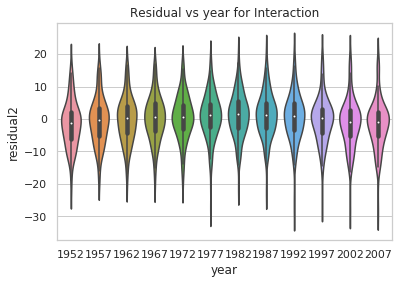

In [22]:
## Exercise 8
plifeExps2 = []
plifeExps2 = regression.predict()
data['plifeExp2'] = pd.Series(plifeExps2, index = data.index)
data['residual2'] = data['lifeExp'] - data['plifeExp2']

sb = sbo.violinplot(x="year", y="residual2", data=data)
sb.set_title('Residual vs year for Interaction')

Text(0.5,1,'Residual vs year for Fitted Models')

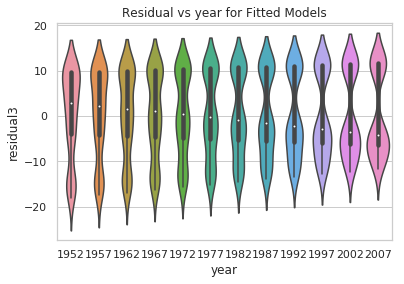

In [23]:
data['residual3'] = data['plifeExp'] - data['plifeExp2']
sb = sbo.violinplot(x="year", y="residual3", data=data)
sb.set_title('Residual vs year for Fitted Models')

In [24]:
#Part 2
#Problem 1

def grad_descent(X, Y, alpha, K, N):

    # weights and loss initialization
    theta = np.zeroes(D)
    loss = np.zeroes(K)

    for k in range(K):
        # we need to predict for kth iteration
        Yh = X.dot(theta)
        # taking partial derivative of our loss function with respect to our weights theta
        # compute loss and gradient 
        for i in range(N):
            loss[k] += compute_loss(Y[i], Yh)
            gradient += compute_gradient(X[i], Y[i], theta)

        # moving in the direction of the gradient then update theta 
        theta = theta - alpha * gradient

    return theta, loss

Problem 2: Derived Equation
$$ B^{k+1} = B^k + \alpha \sum_{i=1}^{n} [y_i - (\frac{e^{B^k * x_i}}{1 + e^{B^k * x_i}})] x_i $$

In [25]:
#Problem 3
import numpy as np
import math as m

def grad_descent(X, Y, alpha, K, N):

    # weights and loss initialization
    theta = np.zeros(len(X[0]))
    loss = np.zeros(N)
    gradient = 0
    
    for k in range(K):
        # we need to find the partial derivative of our loss function with respect to our weights theta
        # then we calculate loss and gradient 
        for i in range(N):
            loss[i] = compute_loss(X[i], Y[i], theta)
            gradient = loss[i] * X[i]
            
        # by moving in the direction of the gradient we update theta
        theta = theta + alpha * gradient
        theta = theta/np.linalg.norm(theta)
        
    return theta, loss

def compute_loss(x, y, theta):
    return y - (m.exp(np.dot(theta, x)))/(1+m.exp(np.dot(theta, x)))

In [26]:
#Problem 4
## simulating data 
# for linear regression
from sklearn import datasets
gen_data_x, gen_data_y = datasets.make_regression(n_samples=20, n_features=20, noise = 1.5)

##simulating data 
#for logistic regression.    
log_gen_data_x, dump_y = datasets.make_regression(n_samples=20, n_features=20, noise = 1.5)
log_gen_data_y = [0 if i>0 else 1 for i in dump_y]

[ 0.38827816 -0.52247149 -0.49706861 -0.11314075 -0.79707643  0.71721749
  0.66924904  0.43893819 -0.58176038 -0.58370862 -0.46174365 -0.49026153
  0.71228285 -0.29435069 -0.47394653  0.64457495  0.51703799 -0.14917194
  0.3520874  -0.00406394]
[ 0.84283385 -0.43252493 -0.50879429 -2.17219446  0.57104475 -0.21348355
 -0.03554152  0.68441065 -0.25175627 -0.24569216 -0.61506873 -0.52922033
 -0.19421437 -1.1686972  -0.57825487  0.04929823  0.44885964 -1.89028243
  0.96196378 -5.505595  ]
[1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0]


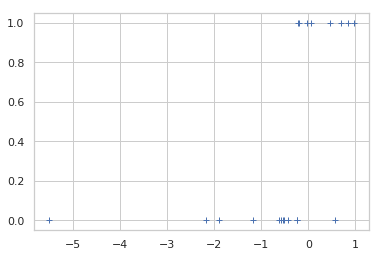

In [27]:
#returns random vector 
(theta, loss) = grad_descent(log_gen_data_x, log_gen_data_y, 5, 5, len(log_gen_data_y))
estimated = np.zeros(len(log_gen_data_y))
for i in range(len(log_gen_data_x[0])):
    estimated += log_gen_data_x[:, i] * theta[i]
estimated += loss
print(loss)
print(estimated)
print(log_gen_data_y)
plot.plot(estimated, log_gen_data_y, '+')

In [28]:
## Try it out
from sklearn.model_selection import cross_val_predict
from sklearn import datasets
from sklearn import tree
from sklearn import metrics

# simulate data for logistic regression.    
X, dump_y = datasets.make_regression(n_samples=100, n_features=20, noise = 1.5)
Y = [0 if i>20 else 1 for i in dump_y]

# Decision Tree Model
model = tree.DecisionTreeClassifier()

# Get scores for ten fold validation (cv=10 means ten fold)
result = cross_val_predict(model, X, Y, cv=10)
print(Y)
print(result)

[0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0]
[0 0 0 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 1 1 1 0 0 0 1 1 1 1
 0 0 1 1 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 0 1 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0
 1 1 0 0 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1]


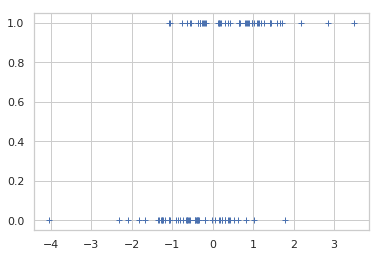

In [29]:
## Scores when using gradient descent
(theta,loss) = grad_descent(X, Y, 20, 20, len(Y))
estimated = np.zeros(len(Y))
for i in range(len(X[0])):
    estimated += X[:, i] * theta[i]
estimated += loss
plot.plot(estimated, Y, '+')

In [30]:
## T test for gradient descent and tree model
from scipy import stats
stats.ttest_rel(result,estimated)

Ttest_relResult(statistic=4.1943660853582045, pvalue=5.9683755099095282e-05)

In [31]:
# linear SVM 
from sklearn import svm

model2 = svm.LinearSVC()
result2 = cross_val_predict(model2, X, Y, cv=10)
stats.ttest_rel(result2,estimated)

Ttest_relResult(statistic=4.6939500765870665, pvalue=8.6208063588372227e-06)